<a href="https://colab.research.google.com/github/avanish04/online-retail-customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Importing Dataset and important libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset
dataset= pd.read_excel('/content/drive/MyDrive/Capstone projects/Customer segmentation /Copy of Online Retail.xlsx')

# Cleaning of Data


In [4]:
dataset.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
dataset.shape

(541909, 8)

**Dataset contains 8 features and 541909 observations**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**From the above result we can see that CustomerID and Description feature contain some null values. In this scenerio we have to drop these observations because we can not fill them randomly.**

In [7]:
# dropping nan values
dataset.dropna(inplace= True)

In [8]:
dataset.shape

(406829, 8)

**After removing the NaN values now, Dataset has 406829 observations left.**

**As given in the problem statement which invoiceNo contain 'c'(which means cancelled), then we have to drop these observations also.**

In [9]:
dataset['InvoiceNo']=dataset['InvoiceNo'].astype('str')
dataset=dataset[~dataset['InvoiceNo'].str.contains('C')]

In [10]:
dataset.shape

(397924, 8)

**At the end, after removing observations contain cancelled order, now dataset have 397924 observations.**




# EDA

In [11]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
dataset.describe(percentiles=[.25, .50, .75, .95,.99])

Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
95%        36.000000       8.500000   17912.000000
99%       120.000000      14.950000   18211.000000
max     80995.000000    8142.750000   18287.000000

**from the above we can say that Quantity and unitprice contain outliers**

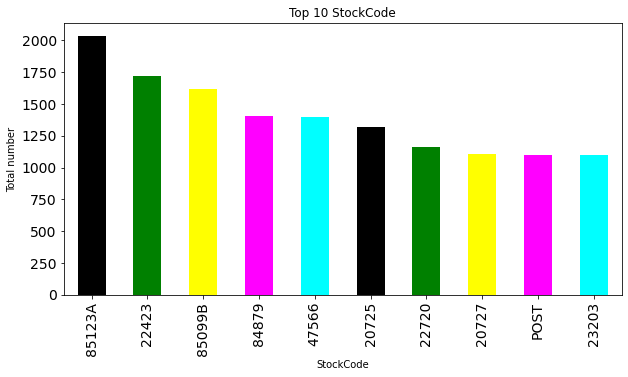

In [13]:
#Top 10 Stockcode which sold maximum(volume-wised)
ax = dataset['StockCode'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])
plt.title('Top 10 StockCode')
plt.xlabel('StockCode')

plt.ylabel('Total number');

**From the above bar graph stock code 85123A sold the highest**


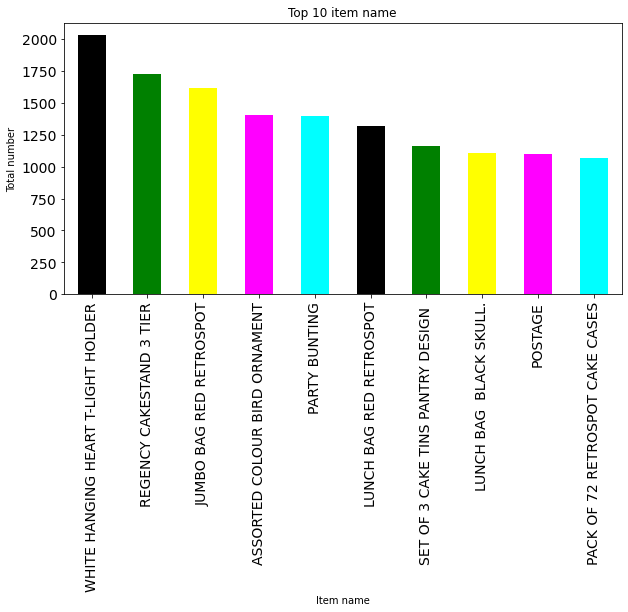

In [14]:
#Top 10 item which sold maximum(volume-wised)
ax = dataset['Description'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])

plt.title('Top 10 item name')
plt.xlabel('Item name')

plt.ylabel('Total number');

**White Hanging heart T-Light holder item sold the highest amongs the other items**

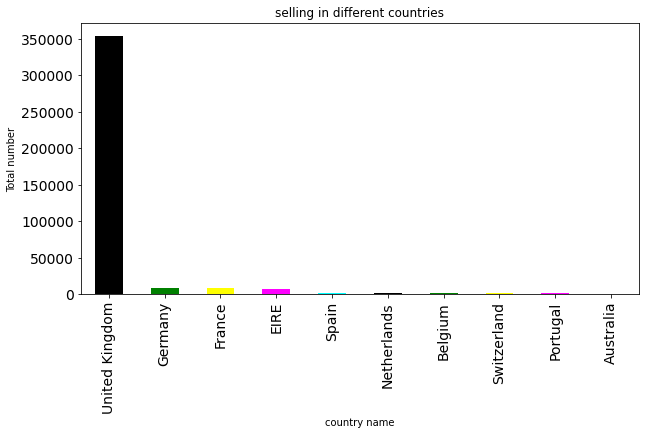

In [15]:
#Top 10 item which sold maximum(volume-wised)
ax = dataset['Country'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])
plt.title('selling in different countries')
plt.xlabel('country name')

plt.ylabel('Total number');

**from the above result, Maximum sell of the store happened in UK**

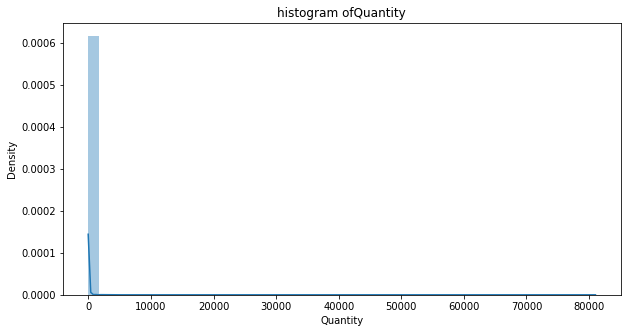

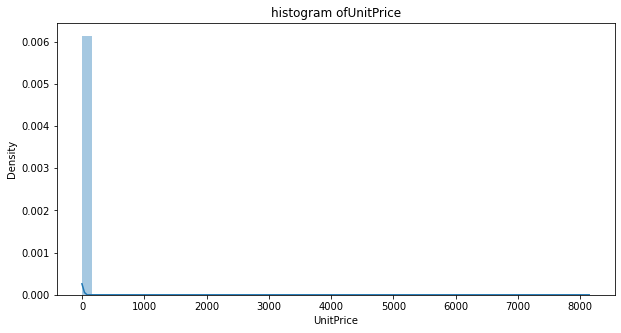

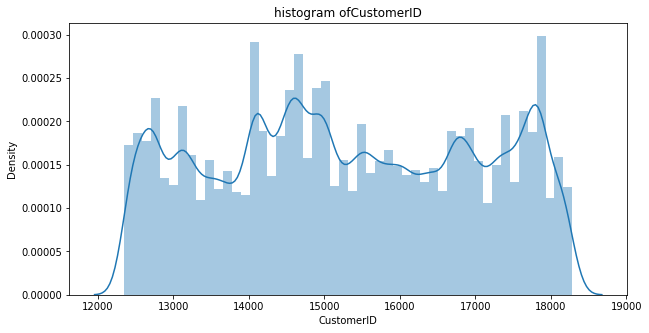

''

In [16]:
for i in list(dataset.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.distplot((dataset[i]) )
  plt.show()
;

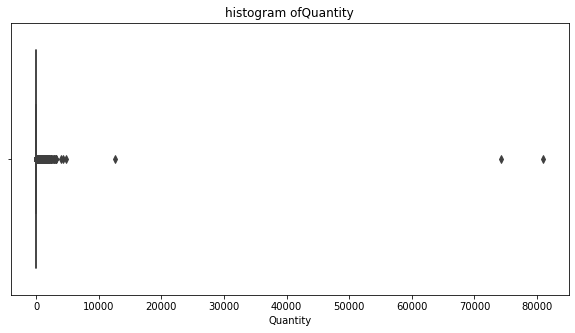

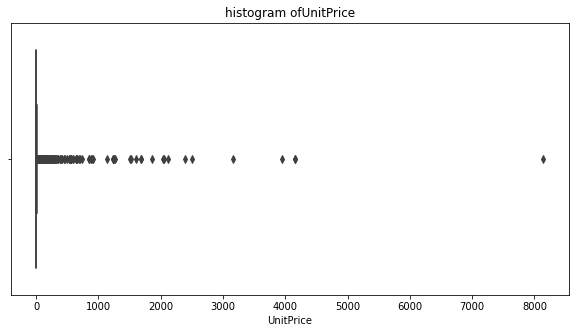

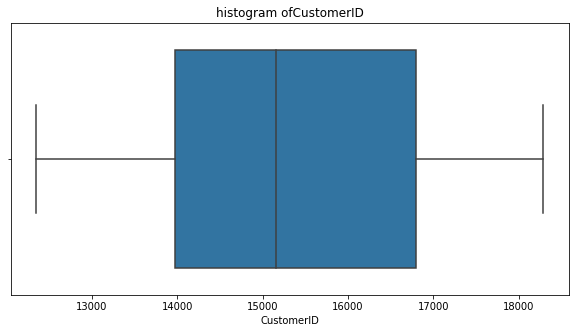

''

In [17]:
for i in list(dataset.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.boxplot((dataset[i]) )
  plt.show()
;

# Feature Engineering

In [11]:
dataset['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

As we can see from invoice date we can extract so much information like time, what day, what month etc

In [12]:
# converting to relevent format
dataset["InvoiceDate"] = pd.to_datetime(dataset["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [13]:
# extracting the relevent data from date
dataset['month_name']=dataset.InvoiceDate.dt.month_name()
dataset['Day_name']=dataset.InvoiceDate.dt.day_name()
dataset['hour']=dataset.InvoiceDate.dt.hour
dataset['year']=dataset.InvoiceDate.dt.year

In [14]:
dataset.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country month_name  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   

    Day_name  hour  year  
0  Wednesday     8  2010  
1  Wednesday     8  2010  
2  Wednesday     8  2010  
3  Wednesday     8  2010  
4  Wednesday     8  2010

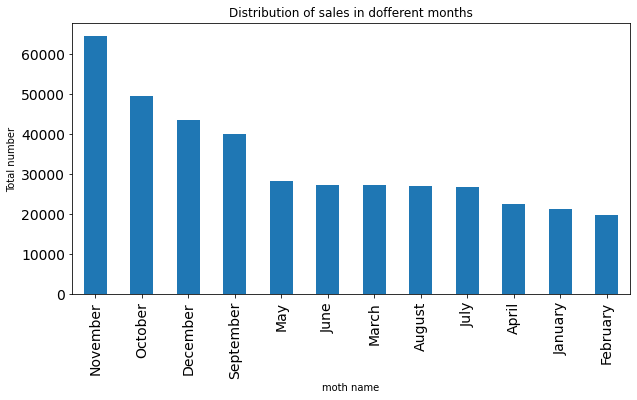

In [15]:
#which month got the maximum number of item sold
ax = dataset['month_name'].value_counts().sort_values(ascending=False)[0:12].plot.bar(
    figsize = (10,5),
    fontsize = 14,
   )
plt.title('Distribution of sales in dofferent months')
plt.xlabel('moth name')

plt.ylabel('Total number');

**From the above graph we can say in november, store evedencing the maximum sale.**

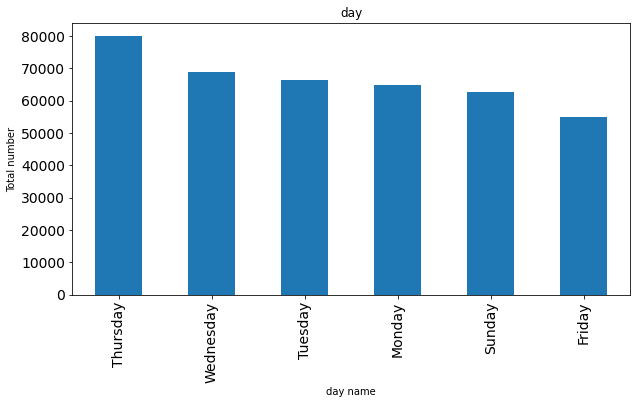

In [16]:
ax = dataset['Day_name'].value_counts().plot.bar(
    figsize = (10,5),
    fontsize = 14,
   )
plt.title('day')
plt.xlabel('day name')

plt.ylabel('Total number');

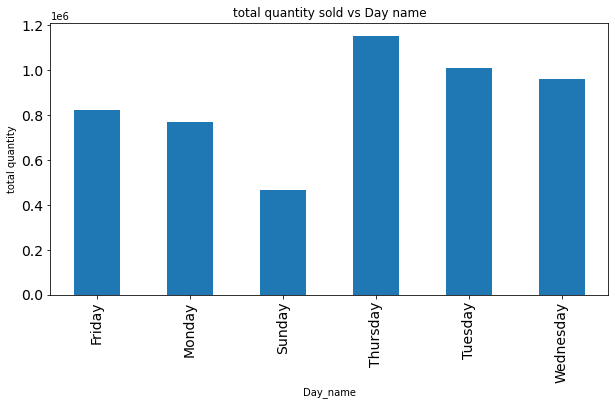

In [17]:
ax = dataset.groupby(['Day_name'])['Quantity'].sum().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('total quantity sold vs Day name')
plt.xlabel('Day_name')

plt.ylabel('total quantity');

**From above 2 plots we can observe that on Thursday there are maximum number of sales and maximum customer buy on Thursday**

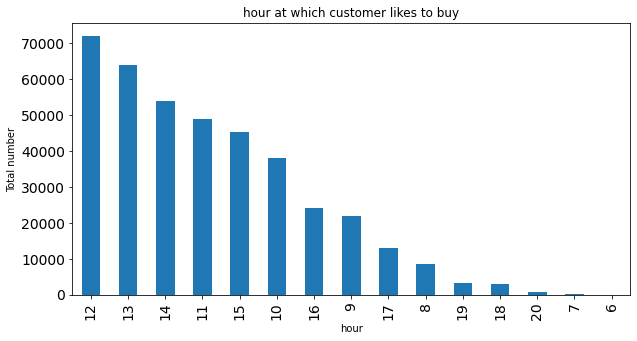

In [19]:
ax = dataset['hour'].value_counts().plot.bar(
    figsize = (10,5),
    fontsize = 14,
   )
plt.title('hour at which customer likes to buy')
plt.xlabel('hour')

plt.ylabel('Total number');

**At mid day 12 noon, customer likes to buy the most.**

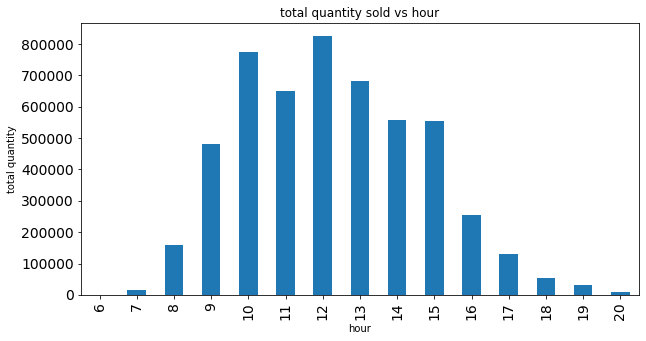

In [20]:
ax = dataset.groupby(['hour'])['Quantity'].sum().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('total quantity sold vs hour')
plt.xlabel('hour')

plt.ylabel('total quantity');

**Total quantity also sold at 12 noon.**

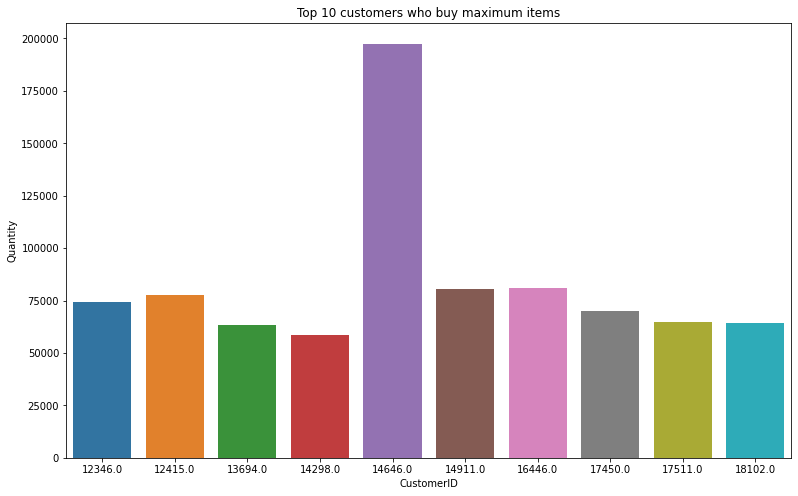

In [21]:
customer_top10= dataset.groupby(['CustomerID'])['Quantity'].sum().sort_values(ascending=False).reset_index()[0:10]

plt.figure(figsize=(13,8))
plt.title('Top 10 customers who buy maximum items')
sns.barplot(x='CustomerID',y='Quantity',data=customer_top10);

**Customer who have customerID 14646 bought the maximum quantity.**

In [22]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'month_name', 'Day_name', 'hour',
       'year'],
      dtype='object')

with the help of unit price and quantity , we can get the total amount spent.

In [23]:
dataset['total_amount']=dataset['Quantity']*dataset['UnitPrice']

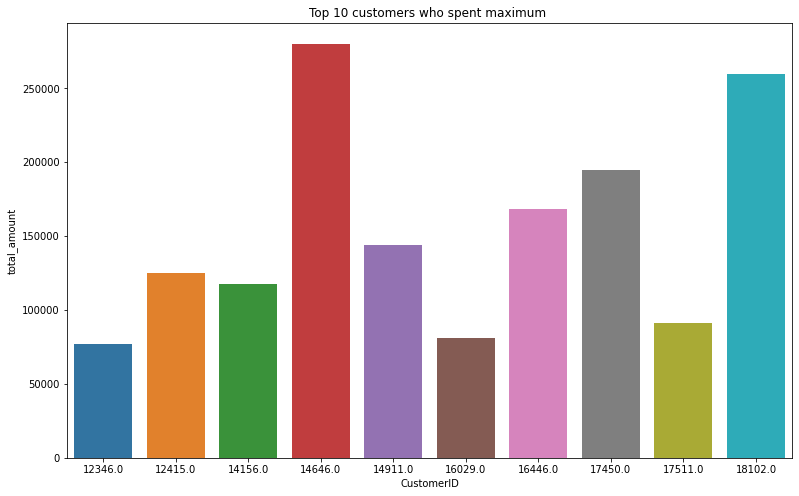

In [27]:
customer_top10_spent= dataset.groupby(['CustomerID'])['total_amount'].sum().sort_values(ascending=False).reset_index()[0:10]

plt.figure(figsize=(13,8))
plt.title('Top 10 customers who spent maximum ')
sns.barplot(x='CustomerID',y='total_amount',data=customer_top10_spent);

**customerID 14646 also spent the maximum amount.**

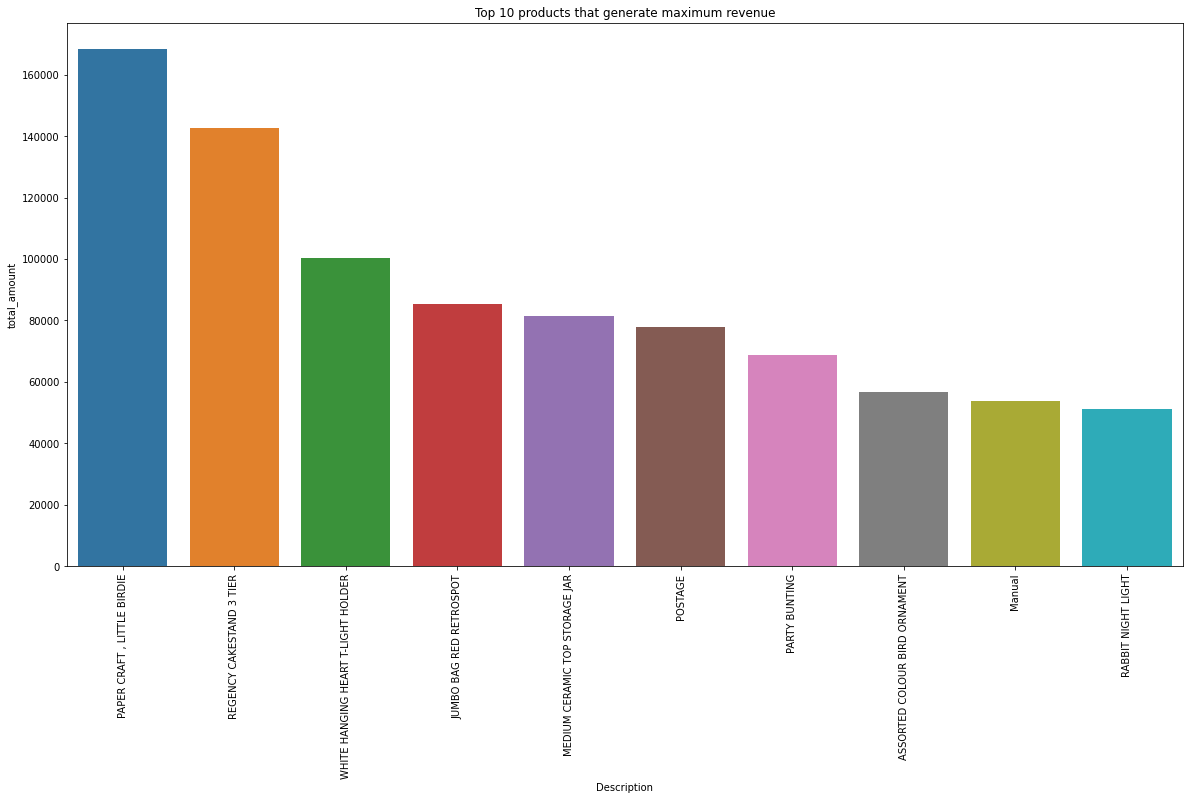

In [36]:
product_top10_revenue= dataset.groupby(['Description'])['total_amount'].sum().sort_values(ascending=False).reset_index()[0:10]

plt.figure(figsize=(20,10))
plt.title('Top 10 products that generate maximum revenue')

plot=sns.barplot(x='Description',y='total_amount',data=product_top10_revenue,)

plt.setp(plot.get_xticklabels(), rotation=90);

**"Paper Craft, Little Birdie" product produced the maximum revenue.**